In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset into the df variable. Used na_values to specify blank spaces as null 
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', na_values=['', ' '])

In [3]:
df.head() #taking a quick look at the attributes

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/21,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,3/26/22,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,6/29/22,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/21,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/21,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [4]:
#Converting the data type from string to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')

/var/folders/dc/j0lqy1290jxb9p2dpc43190w0000gn/T/ipykernel_5367/2416463971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])


In [5]:
#When I opened the original csv and sorted by date, I noticed some inconsistent data.
#Due to inconsistent data before 2017 and after 2021, I want to filter the data to those time periods
cleaned_df = df[(df['CRASH DATE'] >= '2017-01-01') & (df['CRASH DATE'] <= '2021-12-31')]

In [6]:
#Pulling out the attributes that I need for my analysis and disregarding data thats not useful
cleaned_df = cleaned_df[[
    'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]]

In [7]:
cleaned_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,2021-09-11,1900-01-01 02:39:00,NaN,2.0,0.0,0,0,0,0,2,0
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
5,2021-04-14,1900-01-01 12:47:00,NaN,0.0,0.0,0,0,0,0,0,0
6,2021-12-14,1900-01-01 17:05:00,NaN,0.0,0.0,0,0,0,0,0,0


In [8]:
#Removing any data where BOROUGH is null
cleaned_df = cleaned_df.dropna(subset=['BOROUGH'])

In [9]:
cleaned_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
7,2021-12-14,1900-01-01 08:17:00,BRONX,2.0,0.0,0,0,0,0,2,0
8,2021-12-14,1900-01-01 21:10:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
9,2021-12-14,1900-01-01 14:58:00,MANHATTAN,0.0,0.0,0,0,0,0,0,0


In [10]:
#Creating functions to create a column that describes the season and if it is day or night.
def season(date): #my season function will change the date to either WINTER, SPRING, SUMMER or FALL.
    month = date.month
    if month in [12, 1, 2]:
        return 'WINTER'
    elif month in [3, 4, 5]:
        return 'SPRING'
    elif month in [6, 7, 8]:
        return 'SUMMER'
    elif month in [9, 10, 11]:
        return 'FALL'

def day_night(time): #my day_night function will change the time into either DAY or NIGHT
    if 6 <= time.hour < 18:
        return 'DAY'
    else:
        return 'NIGHT'

In [11]:
#Applying the functions
cleaned_df['SEASON'] = cleaned_df['CRASH DATE'].apply(season)
cleaned_df['DAY/NIGHT'] = cleaned_df['CRASH TIME'].apply(day_night)

In [12]:
cleaned_df['YEAR'] = pd.to_datetime(cleaned_df['CRASH DATE']).dt.year #new column to specify year
cleaned_df['CRASH HOUR'] = cleaned_df['CRASH TIME'].dt.hour #new attribute to specify hour

In [13]:
cleaned_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,SEASON,DAY/NIGHT,YEAR,CRASH HOUR
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0,FALL,DAY,2021,9
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0,WINTER,DAY,2021,8
7,2021-12-14,1900-01-01 08:17:00,BRONX,2.0,0.0,0,0,0,0,2,0,WINTER,DAY,2021,8
8,2021-12-14,1900-01-01 21:10:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0,WINTER,NIGHT,2021,21
9,2021-12-14,1900-01-01 14:58:00,MANHATTAN,0.0,0.0,0,0,0,0,0,0,WINTER,DAY,2021,14


In [14]:
#Exporting to csv for your analysis
cleaned_df.to_csv('cleaned_df.csv', index=False)

In [15]:
#Creating a variable to count how many collisions happened each year
year_counts = cleaned_df.groupby('YEAR').size().reset_index(name='Total')

In [16]:
year_counts.head()

,YEAR,Total
0,2017,142954
1,2018,149232
2,2019,137023
3,2020,73678
4,2021,72201


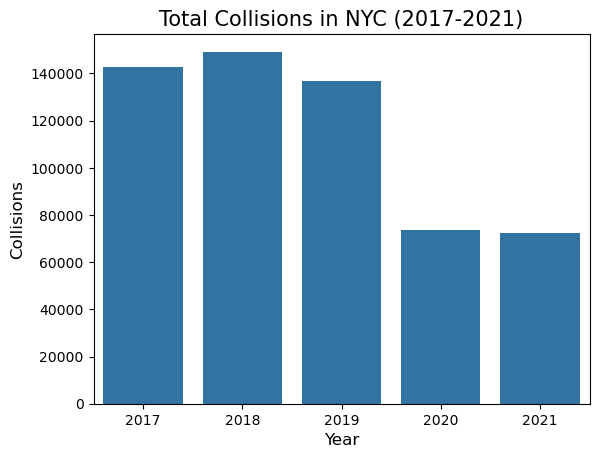

In [17]:
#Using a bar chart to visualize total collisions by year
sns.barplot(x = 'YEAR', y = 'Total', data = year_counts)
plt.title("Total Collisions in NYC (2017-2021)", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Collisions", fontsize=12)
plt.show()

In [18]:
#Creating counts for borough, seasons, and day/night for my next visualization
boro_counts = cleaned_df['BOROUGH'].value_counts()
season_counts = cleaned_df['SEASON'].value_counts()
day_night_counts = cleaned_df['DAY/NIGHT'].value_counts()

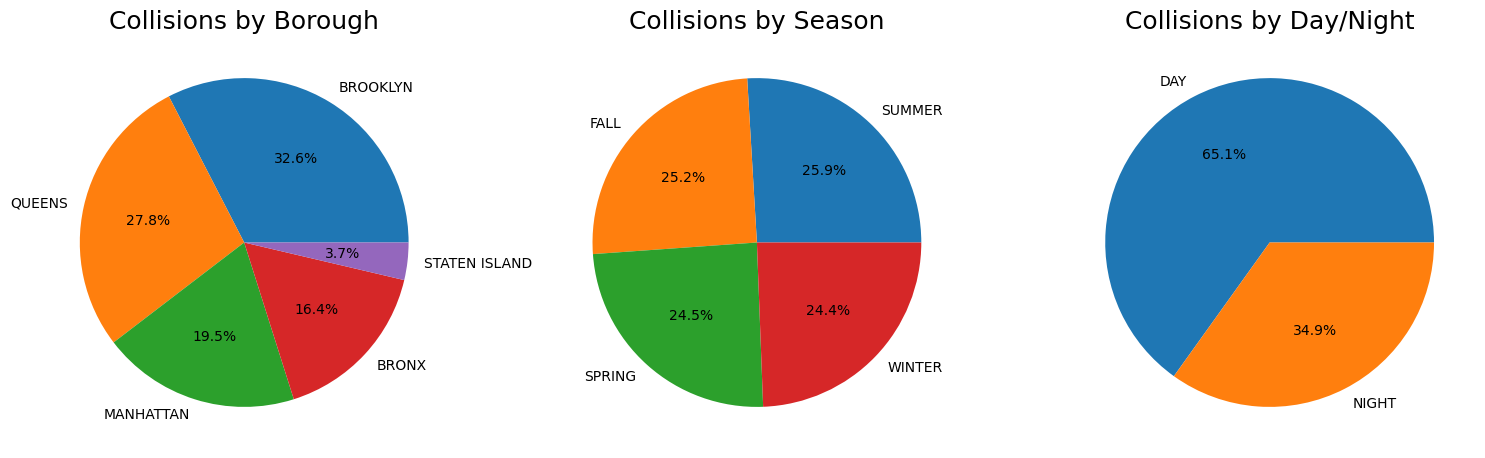

In [19]:
#Creating pie charts to visualize the data of the count variables made above.
#Using subplots so they can be viewed at the same time
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].pie(boro_counts, labels=boro_counts.index, autopct='%1.1f%%')
axes[0].set_title('Collisions by Borough', fontsize=18)

axes[1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%')
axes[1].set_title('Collisions by Season', fontsize=18)

axes[2].pie(day_night_counts, labels=day_night_counts.index, autopct='%1.1f%%')
axes[2].set_title('Collisions by Day/Night', fontsize=18)

plt.tight_layout()
plt.show()

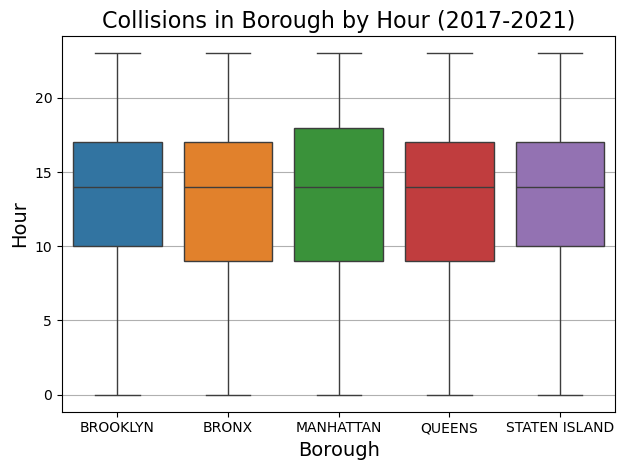

In [20]:
#Using boxplots to see between which hours the most collisions happen by borough
sns.boxplot(x='BOROUGH', y='CRASH HOUR', data=cleaned_df, hue='BOROUGH')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Hour', fontsize=14)
plt.title('Collisions in Borough by Hour (2017-2021)', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
#Removing data that cannot be aggregated for my next plot and creating a new variable
selected_df = cleaned_df.drop(columns=['CRASH DATE','CRASH TIME','SEASON','DAY/NIGHT'])

In [22]:
#Aggregating all the types of collisions into a new variable
aggregate_df = selected_df.groupby(['BOROUGH', 'YEAR']).sum().reset_index()

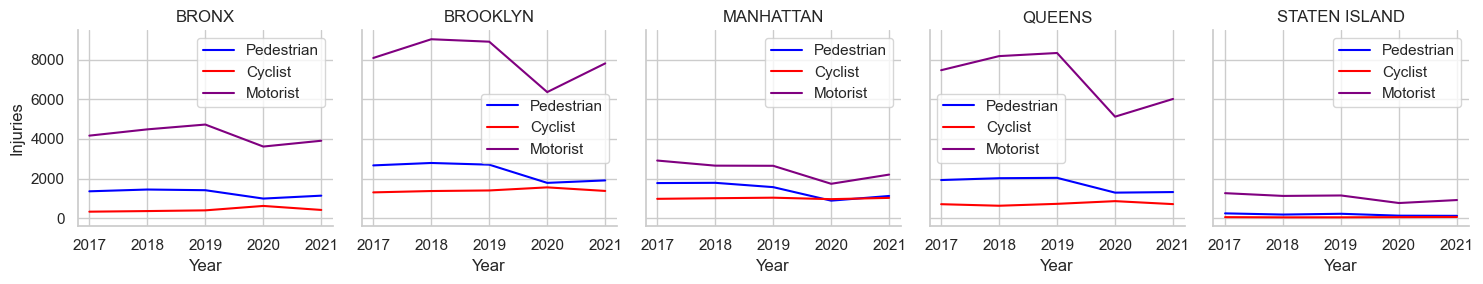

In [23]:
#Making a facet grid of a line chart so I can visualize all the types of injuries in the collisions by year, seperated by borough.
sns.set(style = 'whitegrid')
g = sns.FacetGrid(aggregate_df, col='BOROUGH') #using BOROUGH for col so the charts are separted by BOROUGH
g.map(sns.lineplot, 'YEAR', 'NUMBER OF PEDESTRIANS INJURED', label = 'Pedestrian', color='blue')
g.map(sns.lineplot, 'YEAR', 'NUMBER OF CYCLIST INJURED', label = 'Cyclist', color='red')
g.map(sns.lineplot, 'YEAR', 'NUMBER OF MOTORIST INJURED', label = 'Motorist', color='purple')
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Injuries')
for ax in g.axes.flat:
    ax.legend()
plt.show()

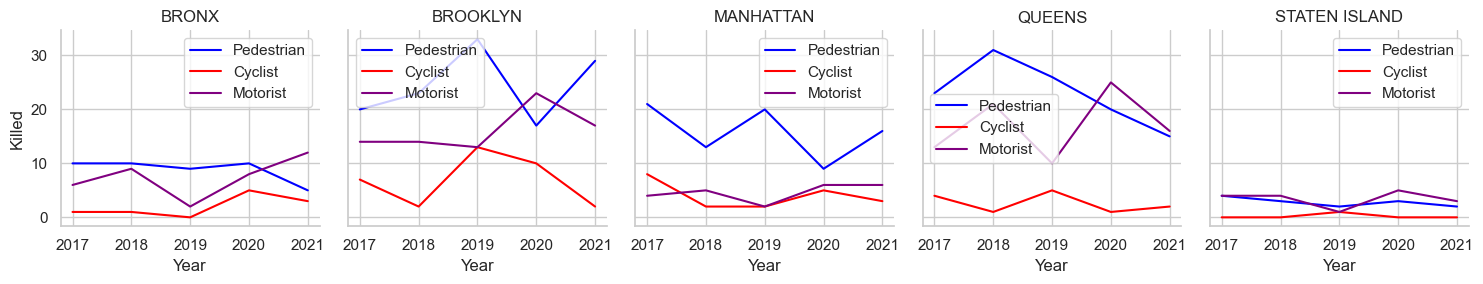

In [24]:
#Same as above, just looking at persons killed by type and borough.
sns.set(style = 'whitegrid')
g = sns.FacetGrid(aggregate_df, col='BOROUGH')
g.map(sns.lineplot, 'YEAR', 'NUMBER OF PEDESTRIANS KILLED', label = 'Pedestrian', color='blue')
g.map(sns.lineplot, 'YEAR', 'NUMBER OF CYCLIST KILLED', label = 'Cyclist', color='red')
g.map(sns.lineplot, 'YEAR', 'NUMBER OF MOTORIST KILLED', label = 'Motorist', color='purple')
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Killed')
for ax in g.axes.flat:
    ax.legend()
plt.show()

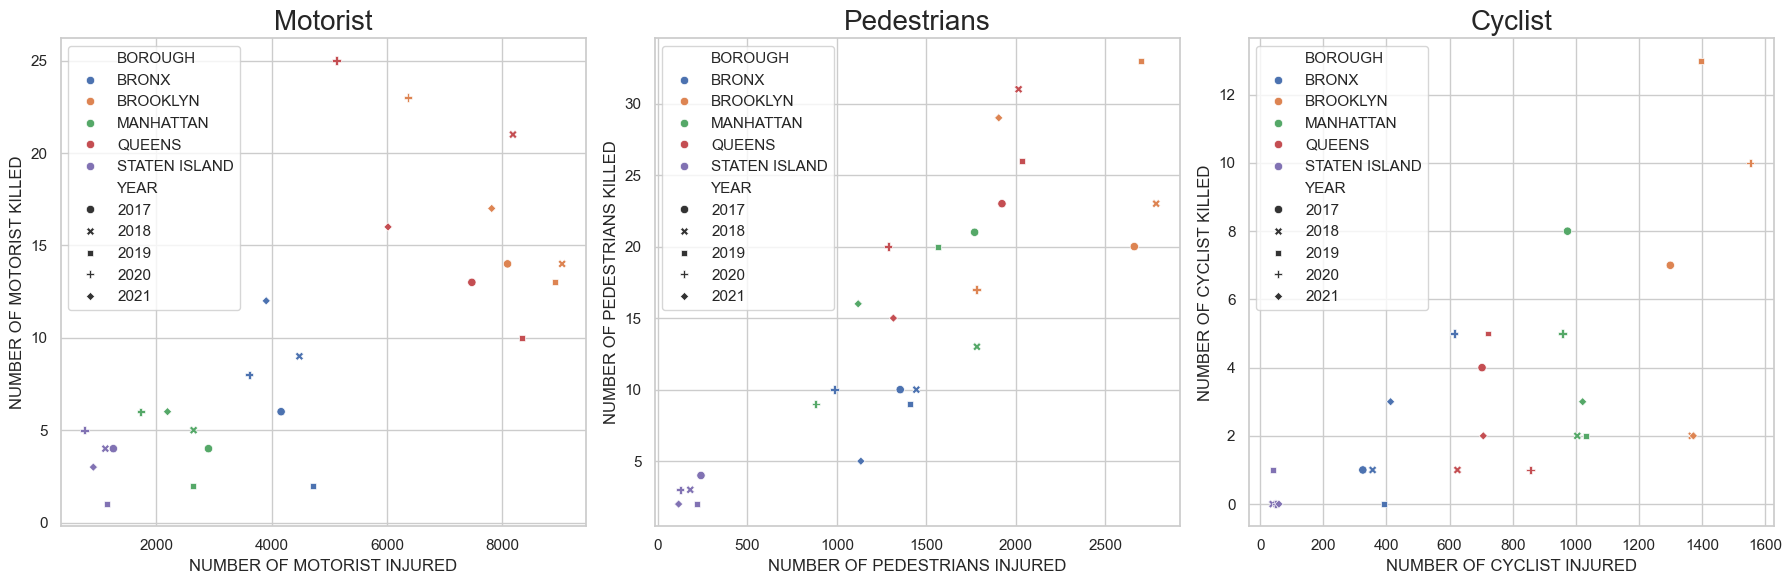

In [25]:
#Using subplots to create scatterplots that compare the total of injured or killed by person.
#I used color to represent the borough, and shape of the data point to distinguish the year.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(
    data=aggregate_df, 
    x='NUMBER OF MOTORIST INJURED', 
    y='NUMBER OF MOTORIST KILLED', 
    hue='BOROUGH', #sets the color
    style='YEAR', #sets the shape
    ax=axes[0]
)
axes[0].set_title("Motorist", fontsize=20)

sns.scatterplot(
    data=aggregate_df, 
    x='NUMBER OF PEDESTRIANS INJURED', 
    y='NUMBER OF PEDESTRIANS KILLED', 
    hue='BOROUGH', 
    style='YEAR',
    ax=axes[1]
)
axes[1].set_title("Pedestrians", fontsize=20)

sns.scatterplot(
    data=aggregate_df, 
    x='NUMBER OF CYCLIST INJURED', 
    y='NUMBER OF CYCLIST KILLED', 
    hue='BOROUGH', 
    style='YEAR',
    ax=axes[2]
)
axes[2].set_title("Cyclist", fontsize=20)
plt.tight_layout()
plt.show()

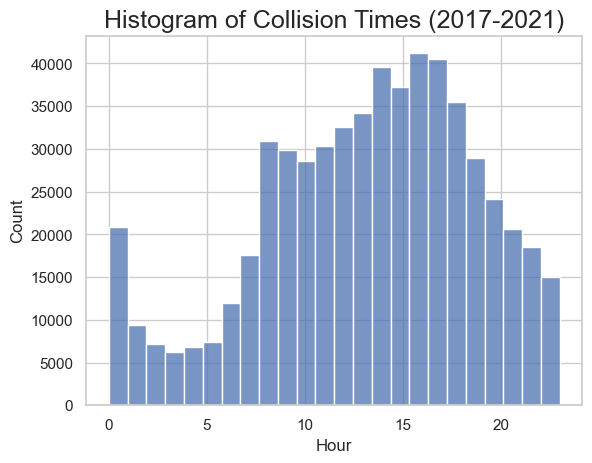

In [26]:
#I made a histogram to see the distribution of collision frequency by hour
sns.histplot(cleaned_df['CRASH HOUR'], bins=24) #24 bins used to account for a 24 hour day.
plt.title('Histogram of Collision Times (2017-2021)', fontsize=18)
plt.xlabel('Hour')
plt.show()